In [84]:
#import packages 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

#import more packages
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [85]:
#load data
df = pd.read_csv('NORAM_HIED_NEW+UP_LOG_REG_1.csv',encoding='latin-1')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 59 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ï»¿Account Name                          17981 non-null  object 
 1   Account ID 18                            17981 non-null  object 
 2   Opportunity Name                         17981 non-null  object 
 3   Opportunity ID 18                        17981 non-null  object 
 4   Stage (1=Closed Won, 0=Closed Lost)      17981 non-null  int64  
 5   Account FTE/Users                        13906 non-null  float64
 6   FTE <1,000                               17981 non-null  int64  
 7   FTE 1,000-5,000                          17981 non-null  int64  
 8   FTE 5,000-10,000                         17981 non-null  int64  
 9   FTE >10,000                              17981 non-null  int64  
 10  Fiscal Quarter                           17981

In [87]:
#identify null variables
df.isnull().sum()

ï»¿Account Name                                0
Account ID 18                                  0
Opportunity Name                               0
Opportunity ID 18                              0
Stage (1=Closed Won, 0=Closed Lost)            0
Account FTE/Users                           4075
FTE <1,000                                     0
FTE 1,000-5,000                                0
FTE 5,000-10,000                               0
FTE >10,000                                    0
Fiscal Quarter                                 0
Fiscal Year                                    0
Sales Owner: Regional Director                 0
Sales Owner: Account Executive                 0
Age                                            0
Gap between Close Date and Go Live Date    12282
Lead Source                                 6369
Lead Source: Chat                              0
Lead Source: Cold Call                         0
Lead Source: CX Generated                      0
Lead Source: CSM Gen

array([[<AxesSubplot:title={'center':'Stage (1=Closed Won, 0=Closed Lost)'}>,
        <AxesSubplot:title={'center':'Account FTE/Users'}>,
        <AxesSubplot:title={'center':'FTE <1,000'}>,
        <AxesSubplot:title={'center':'FTE 1,000-5,000'}>,
        <AxesSubplot:title={'center':'FTE 5,000-10,000'}>,
        <AxesSubplot:title={'center':'FTE >10,000'}>],
       [<AxesSubplot:title={'center':'Fiscal Year'}>,
        <AxesSubplot:title={'center':'Sales Owner: Regional Director'}>,
        <AxesSubplot:title={'center':'Sales Owner: Account Executive'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gap between Close Date and Go Live Date'}>,
        <AxesSubplot:title={'center':'Lead Source: Chat'}>],
       [<AxesSubplot:title={'center':'Lead Source: Cold Call'}>,
        <AxesSubplot:title={'center':'Lead Source: CX Generated'}>,
        <AxesSubplot:title={'center':'Lead Source: CSM Generated'}>,
        <AxesSubplot:title={'center':'Lead Sou

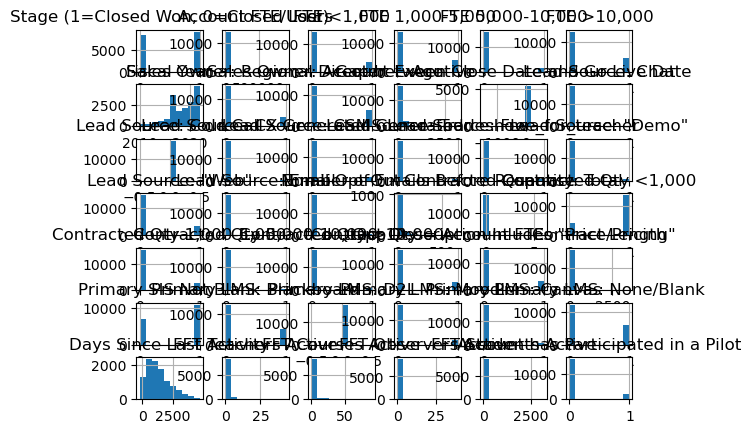

In [88]:
df.hist()

In [89]:
#drop complicating variables
df= df.drop(['Number of Emails Before Response'], axis=1)
df= df.drop(['Gap between Close Date and Go Live Date'], axis=1)
df= df.drop(['Lead Source'], axis=1)
df= df.drop(['ï»¿Account Name'], axis=1)
df= df.drop(['Opportunity Name'], axis=1)
df= df.drop(['Account ID 18'], axis=1)
df= df.drop(['Opportunity ID 18'], axis=1)
df= df.drop(['Contact: Title'], axis=1)
df= df.drop(['Implementation Package'], axis=1)
df= df.drop(['Primary LMS'], axis=1)
df= df.drop(['Primary SIS'], axis=1)
df= df.drop(['Org Type'], axis=1)
df= df.drop(['Customer Success Region'], axis=1)


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      17981 non-null  int64  
 1   Account FTE/Users                        13906 non-null  float64
 2   FTE <1,000                               17981 non-null  int64  
 3   FTE 1,000-5,000                          17981 non-null  int64  
 4   FTE 5,000-10,000                         17981 non-null  int64  
 5   FTE >10,000                              17981 non-null  int64  
 6   Fiscal Quarter                           17981 non-null  object 
 7   Fiscal Year                              17981 non-null  int64  
 8   Sales Owner: Regional Director           17981 non-null  int64  
 9   Sales Owner: Account Executive           17981 non-null  int64  
 10  Age                                      17981

<AxesSubplot:>

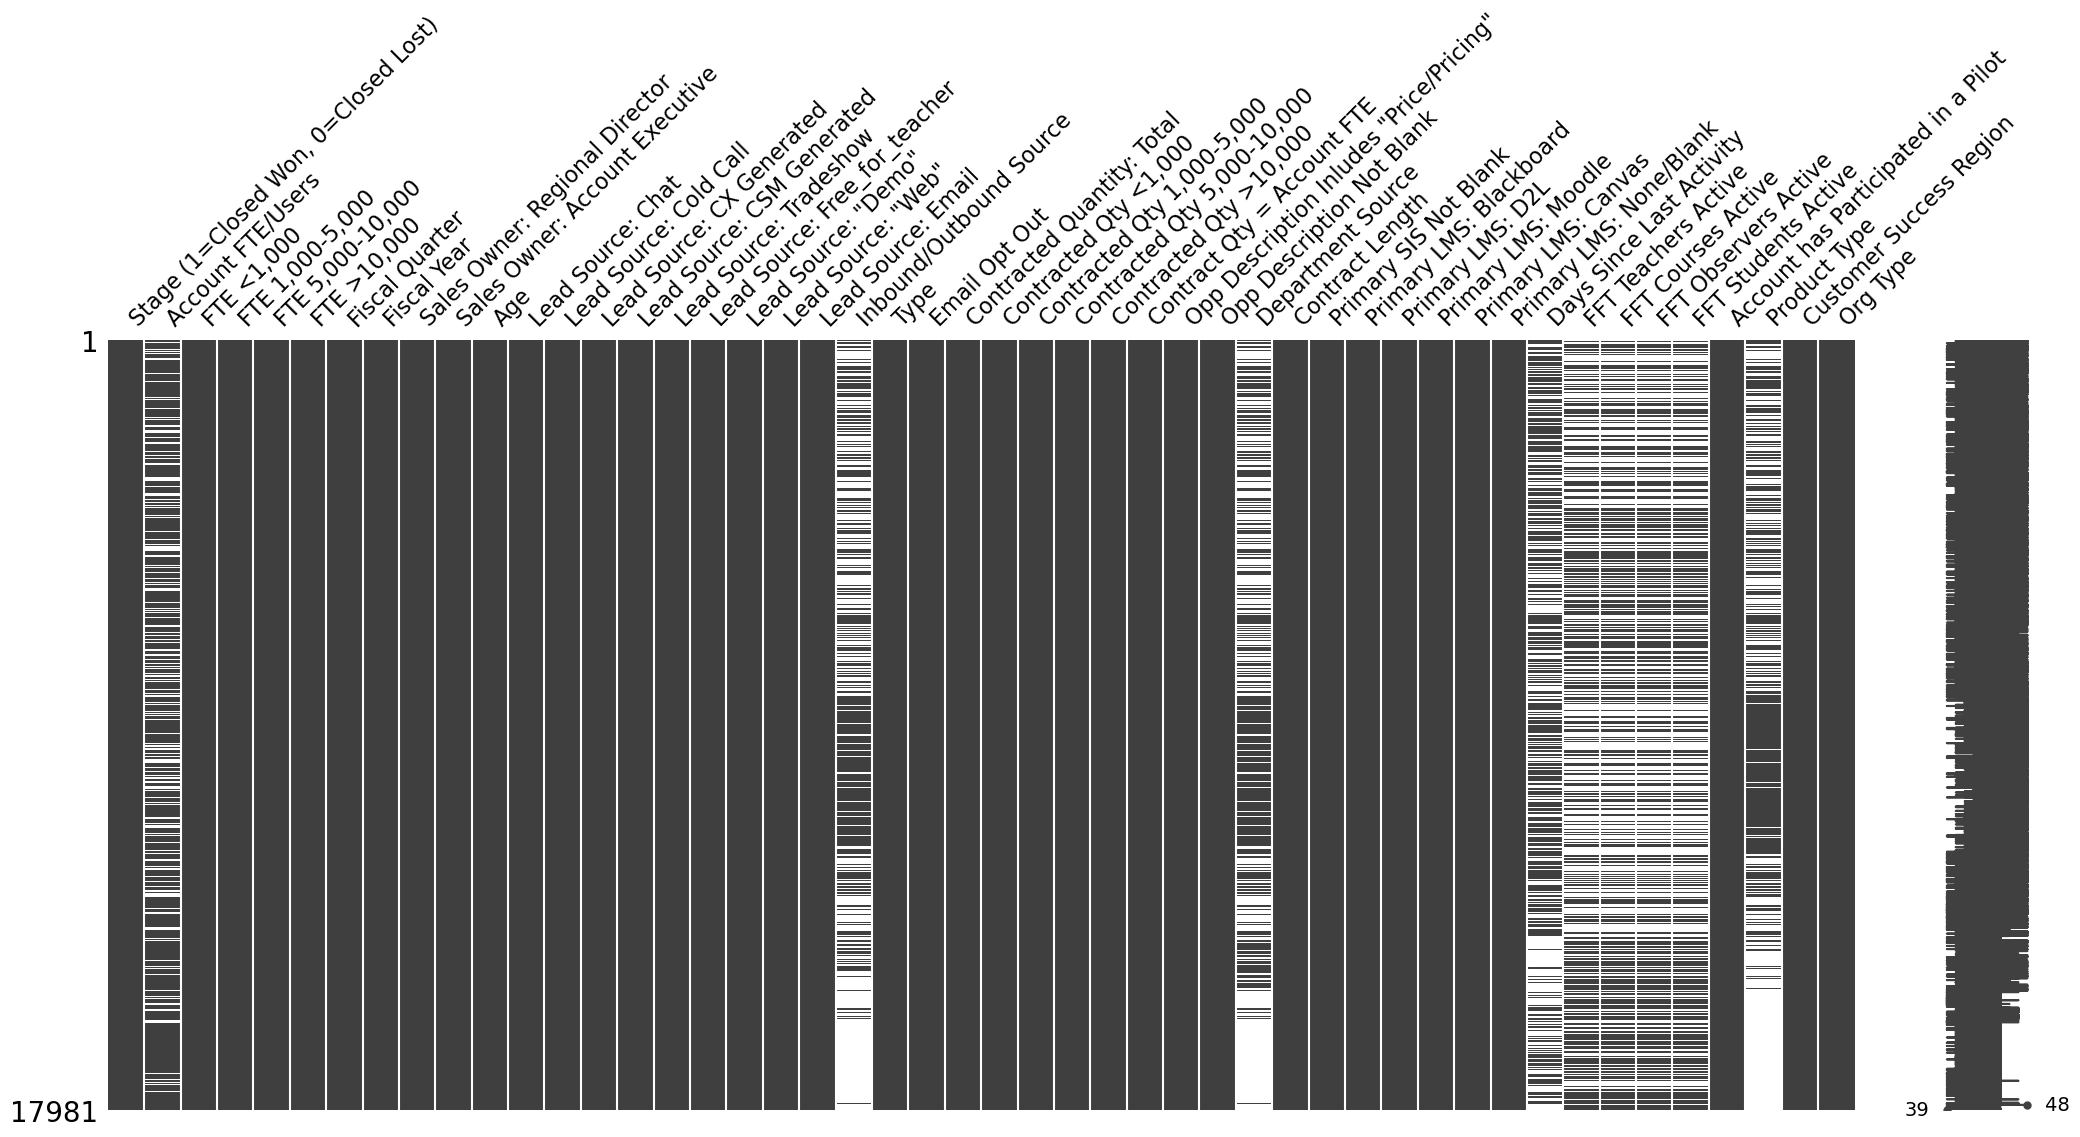

In [91]:
import missingno as msno
msno.matrix(df)

In [92]:
#verify there are no null values
df.isnull().sum()

Stage (1=Closed Won, 0=Closed Lost)           0
Account FTE/Users                          4075
FTE <1,000                                    0
FTE 1,000-5,000                               0
FTE 5,000-10,000                              0
FTE >10,000                                   0
Fiscal Quarter                                0
Fiscal Year                                   0
Sales Owner: Regional Director                0
Sales Owner: Account Executive                0
Age                                           0
Lead Source: Chat                             0
Lead Source: Cold Call                        0
Lead Source: CX Generated                     0
Lead Source: CSM Generated                    0
Lead Source: Tradeshow                        0
Lead Source: Free_for_teacher                 0
Lead Source: "Demo"                           0
Lead Source: "Web"                            0
Lead Source: Email                            0
Inbound/Outbound Source                 

array([[<AxesSubplot:title={'center':'Stage (1=Closed Won, 0=Closed Lost)'}>,
        <AxesSubplot:title={'center':'Account FTE/Users'}>,
        <AxesSubplot:title={'center':'FTE <1,000'}>,
        <AxesSubplot:title={'center':'FTE 1,000-5,000'}>,
        <AxesSubplot:title={'center':'FTE 5,000-10,000'}>,
        <AxesSubplot:title={'center':'FTE >10,000'}>],
       [<AxesSubplot:title={'center':'Fiscal Year'}>,
        <AxesSubplot:title={'center':'Sales Owner: Regional Director'}>,
        <AxesSubplot:title={'center':'Sales Owner: Account Executive'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Lead Source: Chat'}>,
        <AxesSubplot:title={'center':'Lead Source: Cold Call'}>],
       [<AxesSubplot:title={'center':'Lead Source: CX Generated'}>,
        <AxesSubplot:title={'center':'Lead Source: CSM Generated'}>,
        <AxesSubplot:title={'center':'Lead Source: Tradeshow'}>,
        <AxesSubplot:title={'center':'Lead Source: Free_for_tea

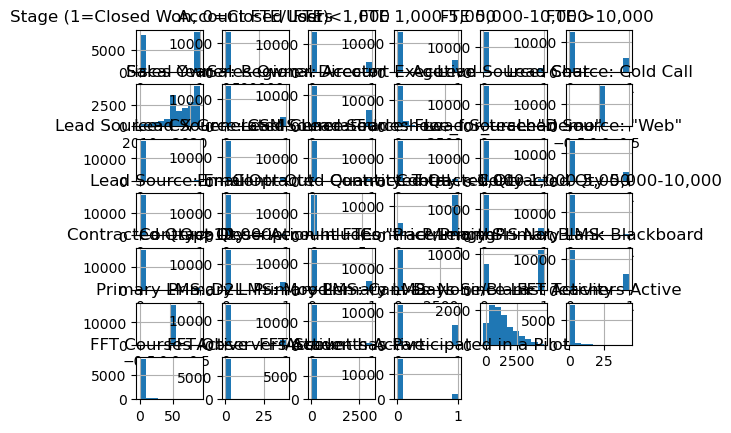

In [93]:
#verify the distribution after imputation
df.hist()

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      17981 non-null  int64  
 1   Account FTE/Users                        13906 non-null  float64
 2   FTE <1,000                               17981 non-null  int64  
 3   FTE 1,000-5,000                          17981 non-null  int64  
 4   FTE 5,000-10,000                         17981 non-null  int64  
 5   FTE >10,000                              17981 non-null  int64  
 6   Fiscal Quarter                           17981 non-null  object 
 7   Fiscal Year                              17981 non-null  int64  
 8   Sales Owner: Regional Director           17981 non-null  int64  
 9   Sales Owner: Account Executive           17981 non-null  int64  
 10  Age                                      17981

In [95]:
#perform imputation for nulls (If there is symmetry in the dataset, use the mean. If the dataset is skewed use the median. Use the mode with qualitative variables.)
df['Account FTE/Users'].fillna(df['Account FTE/Users'].mean(), inplace=True)
df['Department Source'].fillna(df['Department Source'].mode()[0], inplace=True)
df['Product Type'].fillna(df['Product Type'].mode()[0], inplace=True)
df['Inbound/Outbound Source'].fillna(df['Inbound/Outbound Source'].mode()[0], inplace=True)
df['Days Since Last Activity'].fillna(df['Days Since Last Activity'].mean(), inplace=True)
df['FFT Teachers Active'].fillna(df['FFT Teachers Active'].median(), inplace=True)
df['FFT Students Active'].fillna(df['FFT Students Active'].median(), inplace=True)
df['FFT Observers Active'].fillna(df['FFT Observers Active'].median(), inplace=True)
df['FFT Courses Active'].fillna(df['FFT Courses Active'].median(), inplace=True)

<AxesSubplot:>

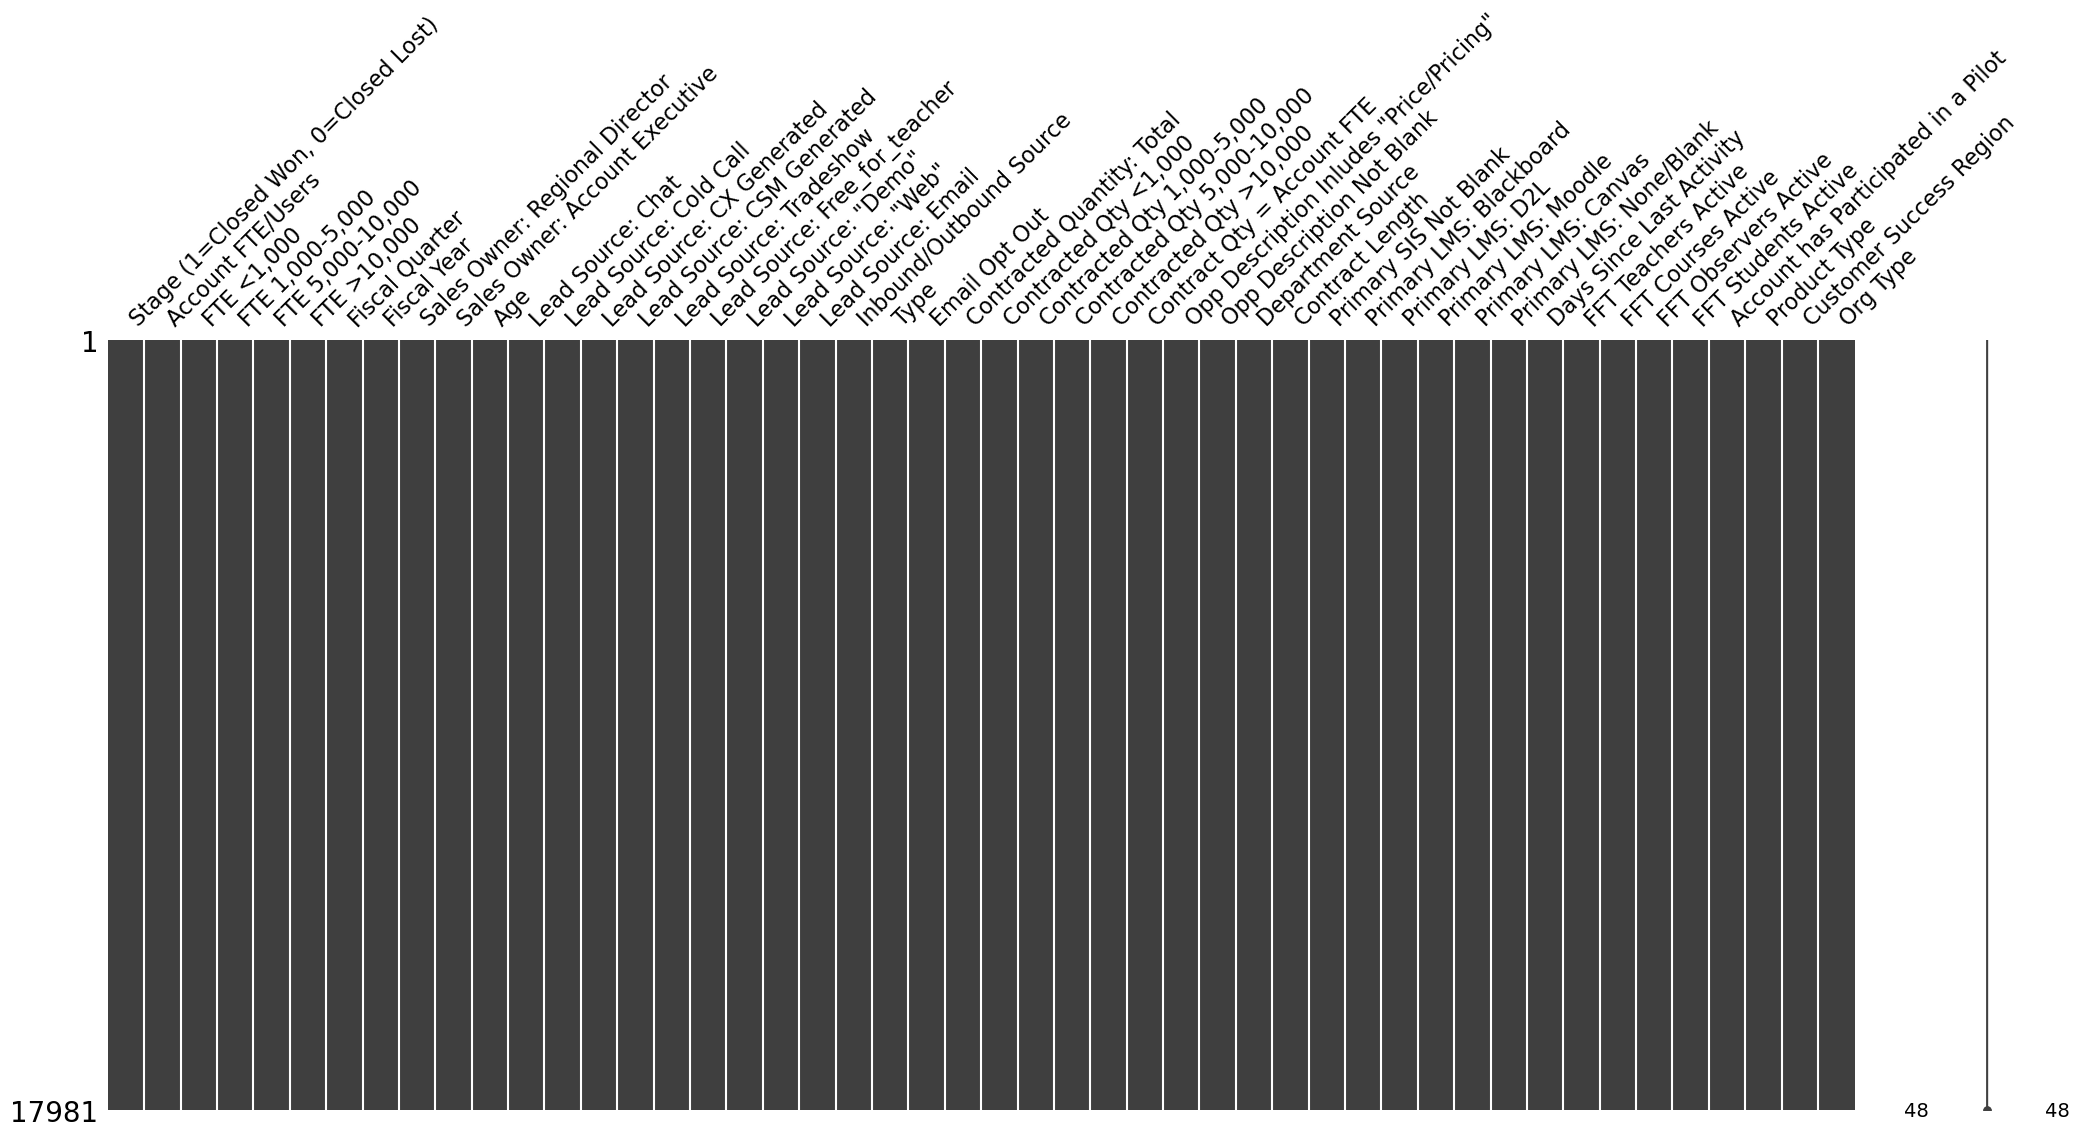

In [96]:
import missingno as msno
msno.matrix(df)

In [97]:
#verify there are no null values
df.isnull().sum()


Stage (1=Closed Won, 0=Closed Lost)        0
Account FTE/Users                          0
FTE <1,000                                 0
FTE 1,000-5,000                            0
FTE 5,000-10,000                           0
FTE >10,000                                0
Fiscal Quarter                             0
Fiscal Year                                0
Sales Owner: Regional Director             0
Sales Owner: Account Executive             0
Age                                        0
Lead Source: Chat                          0
Lead Source: Cold Call                     0
Lead Source: CX Generated                  0
Lead Source: CSM Generated                 0
Lead Source: Tradeshow                     0
Lead Source: Free_for_teacher              0
Lead Source: "Demo"                        0
Lead Source: "Web"                         0
Lead Source: Email                         0
Inbound/Outbound Source                    0
Type                                       0
Email Opt 

array([[<AxesSubplot:title={'center':'Stage (1=Closed Won, 0=Closed Lost)'}>,
        <AxesSubplot:title={'center':'Account FTE/Users'}>,
        <AxesSubplot:title={'center':'FTE <1,000'}>,
        <AxesSubplot:title={'center':'FTE 1,000-5,000'}>,
        <AxesSubplot:title={'center':'FTE 5,000-10,000'}>,
        <AxesSubplot:title={'center':'FTE >10,000'}>],
       [<AxesSubplot:title={'center':'Fiscal Year'}>,
        <AxesSubplot:title={'center':'Sales Owner: Regional Director'}>,
        <AxesSubplot:title={'center':'Sales Owner: Account Executive'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Lead Source: Chat'}>,
        <AxesSubplot:title={'center':'Lead Source: Cold Call'}>],
       [<AxesSubplot:title={'center':'Lead Source: CX Generated'}>,
        <AxesSubplot:title={'center':'Lead Source: CSM Generated'}>,
        <AxesSubplot:title={'center':'Lead Source: Tradeshow'}>,
        <AxesSubplot:title={'center':'Lead Source: Free_for_tea

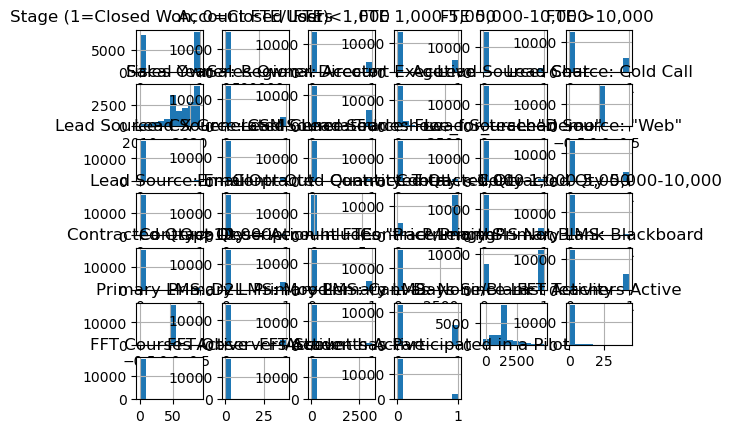

In [98]:
#verify the distribution after imputation
df.hist()

In [99]:
df.dtypes

Stage (1=Closed Won, 0=Closed Lost)          int64
Account FTE/Users                          float64
FTE <1,000                                   int64
FTE 1,000-5,000                              int64
FTE 5,000-10,000                             int64
FTE >10,000                                  int64
Fiscal Quarter                              object
Fiscal Year                                  int64
Sales Owner: Regional Director               int64
Sales Owner: Account Executive               int64
Age                                          int64
Lead Source: Chat                            int64
Lead Source: Cold Call                       int64
Lead Source: CX Generated                    int64
Lead Source: CSM Generated                   int64
Lead Source: Tradeshow                       int64
Lead Source: Free_for_teacher                int64
Lead Source: "Demo"                          int64
Lead Source: "Web"                           int64
Lead Source: Email             

In [100]:
# create dummy variables 
dummies= pd.get_dummies(df[["Fiscal Quarter","Inbound/Outbound Source","Type","Department Source","Product Type"]])
df = pd.concat([df, dummies], axis=1)

In [101]:
df.describe()

,"Stage (1=Closed Won, 0=Closed Lost)",Account FTE/Users,"FTE <1,000","FTE 1,000-5,000","FTE 5,000-10,000","FTE >10,000",Fiscal Year,Sales Owner: Regional Director,Sales Owner: Account Executive,Age,...,Product Type_Implementation,Product Type_Instructional Design,Product Type_Migration,Product Type_Partnership,Product Type_Pilot,Product Type_Strategic Consulting,Product Type_Strategic Services,Product Type_Subscription Add-ons,Product Type_Support,Product Type_Training
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,...,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,0.519437,13155.033079,0.202102,0.228686,0.092876,0.249708,2018.398031,0.195873,0.293254,150.854291,...,0.673266,0.014070,0.013514,0.025193,0.000334,0.001112,0.004171,0.024860,0.033424,0.058061
std,0.499636,32777.555461,0.401579,0.419998,0.290266,0.432856,2.783995,0.396883,0.455267,226.914269,...,0.469032,0.117785,0.115466,0.156716,0.018265,0.033333,0.064451,0.155701,0.179746,0.233866
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1370.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,0.000000,0.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8225.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,0.000000,0.000000,66.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,13155.033079,0.000000,0.000000,0.000000,0.000000,2021.000000,0.000000,1.000000,195.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,900000.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,1.000000,1.000000,3187.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
df = df.drop(['Fiscal Quarter'], axis=1)
df = df.drop(['Inbound/Outbound Source'], axis=1)
df = df.drop(['Type'], axis=1)
df = df.drop(['Department Source'], axis=1)
df = df.drop(['Product Type'], axis=1)

In [104]:
df.dtypes

Stage (1=Closed Won, 0=Closed Lost)      int64
Account FTE/Users                      float64
FTE <1,000                               int64
FTE 1,000-5,000                          int64
FTE 5,000-10,000                         int64
                                        ...   
Product Type_Strategic Consulting        uint8
Product Type_Strategic Services          uint8
Product Type_Subscription Add-ons        uint8
Product Type_Support                     uint8
Product Type_Training                    uint8
Length: 71, dtype: object

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 71 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      17981 non-null  int64  
 1   Account FTE/Users                        17981 non-null  float64
 2   FTE <1,000                               17981 non-null  int64  
 3   FTE 1,000-5,000                          17981 non-null  int64  
 4   FTE 5,000-10,000                         17981 non-null  int64  
 5   FTE >10,000                              17981 non-null  int64  
 6   Fiscal Year                              17981 non-null  int64  
 7   Sales Owner: Regional Director           17981 non-null  int64  
 8   Sales Owner: Account Executive           17981 non-null  int64  
 9   Age                                      17981 non-null  int64  
 10  Lead Source: Chat                        17981

In [107]:
#drop k-1 dummy variables
df = df.drop(['Fiscal Quarter_Q1'], axis=1)
df = df.drop(['Inbound/Outbound Source_Inbound'], axis=1)
df = df.drop(['Department Source_Partner Generated'], axis=1)
df = df.drop(['Product Type_Subscription Add-ons'], axis=1)
df = df.drop(['Opp Description Not Blank'], axis=1)
df = df.drop(['Type_Upsell'], axis=1)


KeyError: "['Implementation Package_Other'] not found in axis"

In [108]:
df = df.drop(['Product Type_Subscription Add-ons'], axis=1)

In [109]:
df = df.drop(['Opp Description Not Blank'], axis=1)

In [110]:
df = df.drop(['Type_Upsell'], axis=1)

In [112]:
# transform variables
df['Fiscal Quarter_Q2'] = df['Fiscal Quarter_Q2'].astype(float)
df['Fiscal Quarter_Q3'] = df['Fiscal Quarter_Q3'].astype(float)
df['Fiscal Quarter_Q4'] = df['Fiscal Quarter_Q4'].astype(float)
df['Inbound/Outbound Source_Outbound'] = df['Inbound/Outbound Source_Outbound'].astype(float)
df['Department Source_CS Generated'] = df['Department Source_CS Generated'].astype(float)
df['Department Source_CX Generated'] = df['Department Source_CX Generated'].astype(float)
df['Department Source_Channel Generated'] = df['Department Source_Channel Generated'].astype(float)
df['Department Source_Marketing Generated'] = df['Department Source_Marketing Generated'].astype(float)
df['Department Source_Sales Generated'] = df['Department Source_Sales Generated'].astype(float)
df['Product Type_Cloud SaaS Subscription'] = df['Product Type_Cloud SaaS Subscription'].astype(float)
df['Product Type_Custom Development'] = df['Product Type_Custom Development'].astype(float)
df['Product Type_Implementation'] = df['Product Type_Implementation'].astype(float)
df['Product Type_Pilot'] = df['Product Type_Pilot'].astype(float)
df['Product Type_Support'] = df['Product Type_Support'].astype(float)
df['Product Type_Training'] = df['Product Type_Training'].astype(float)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 63 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      17981 non-null  int64  
 1   Account FTE/Users                        17981 non-null  float64
 2   FTE <1,000                               17981 non-null  int64  
 3   FTE 1,000-5,000                          17981 non-null  int64  
 4   FTE 5,000-10,000                         17981 non-null  int64  
 5   FTE >10,000                              17981 non-null  int64  
 6   Fiscal Year                              17981 non-null  int64  
 7   Sales Owner: Regional Director           17981 non-null  int64  
 8   Sales Owner: Account Executive           17981 non-null  int64  
 9   Age                                      17981 non-null  int64  
 10  Lead Source: Chat                        17981

In [114]:
df= df.drop(['Org Type'], axis=1)
df= df.drop(['Customer Success Region'], axis=1)

In [116]:
# Calculate the required sample size
N = 10 k / p
1,193=(10*62) / .51943

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 63 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      17981 non-null  int64  
 1   Account FTE/Users                        17981 non-null  float64
 2   FTE <1,000                               17981 non-null  int64  
 3   FTE 1,000-5,000                          17981 non-null  int64  
 4   FTE 5,000-10,000                         17981 non-null  int64  
 5   FTE >10,000                              17981 non-null  int64  
 6   Fiscal Year                              17981 non-null  int64  
 7   Sales Owner: Regional Director           17981 non-null  int64  
 8   Sales Owner: Account Executive           17981 non-null  int64  
 9   Age                                      17981 non-null  int64  
 10  Lead Source: Chat                        17981

In [ ]:
# Calculate the required sample size
N = 10 k / p
1,307=(10*62) / .4742

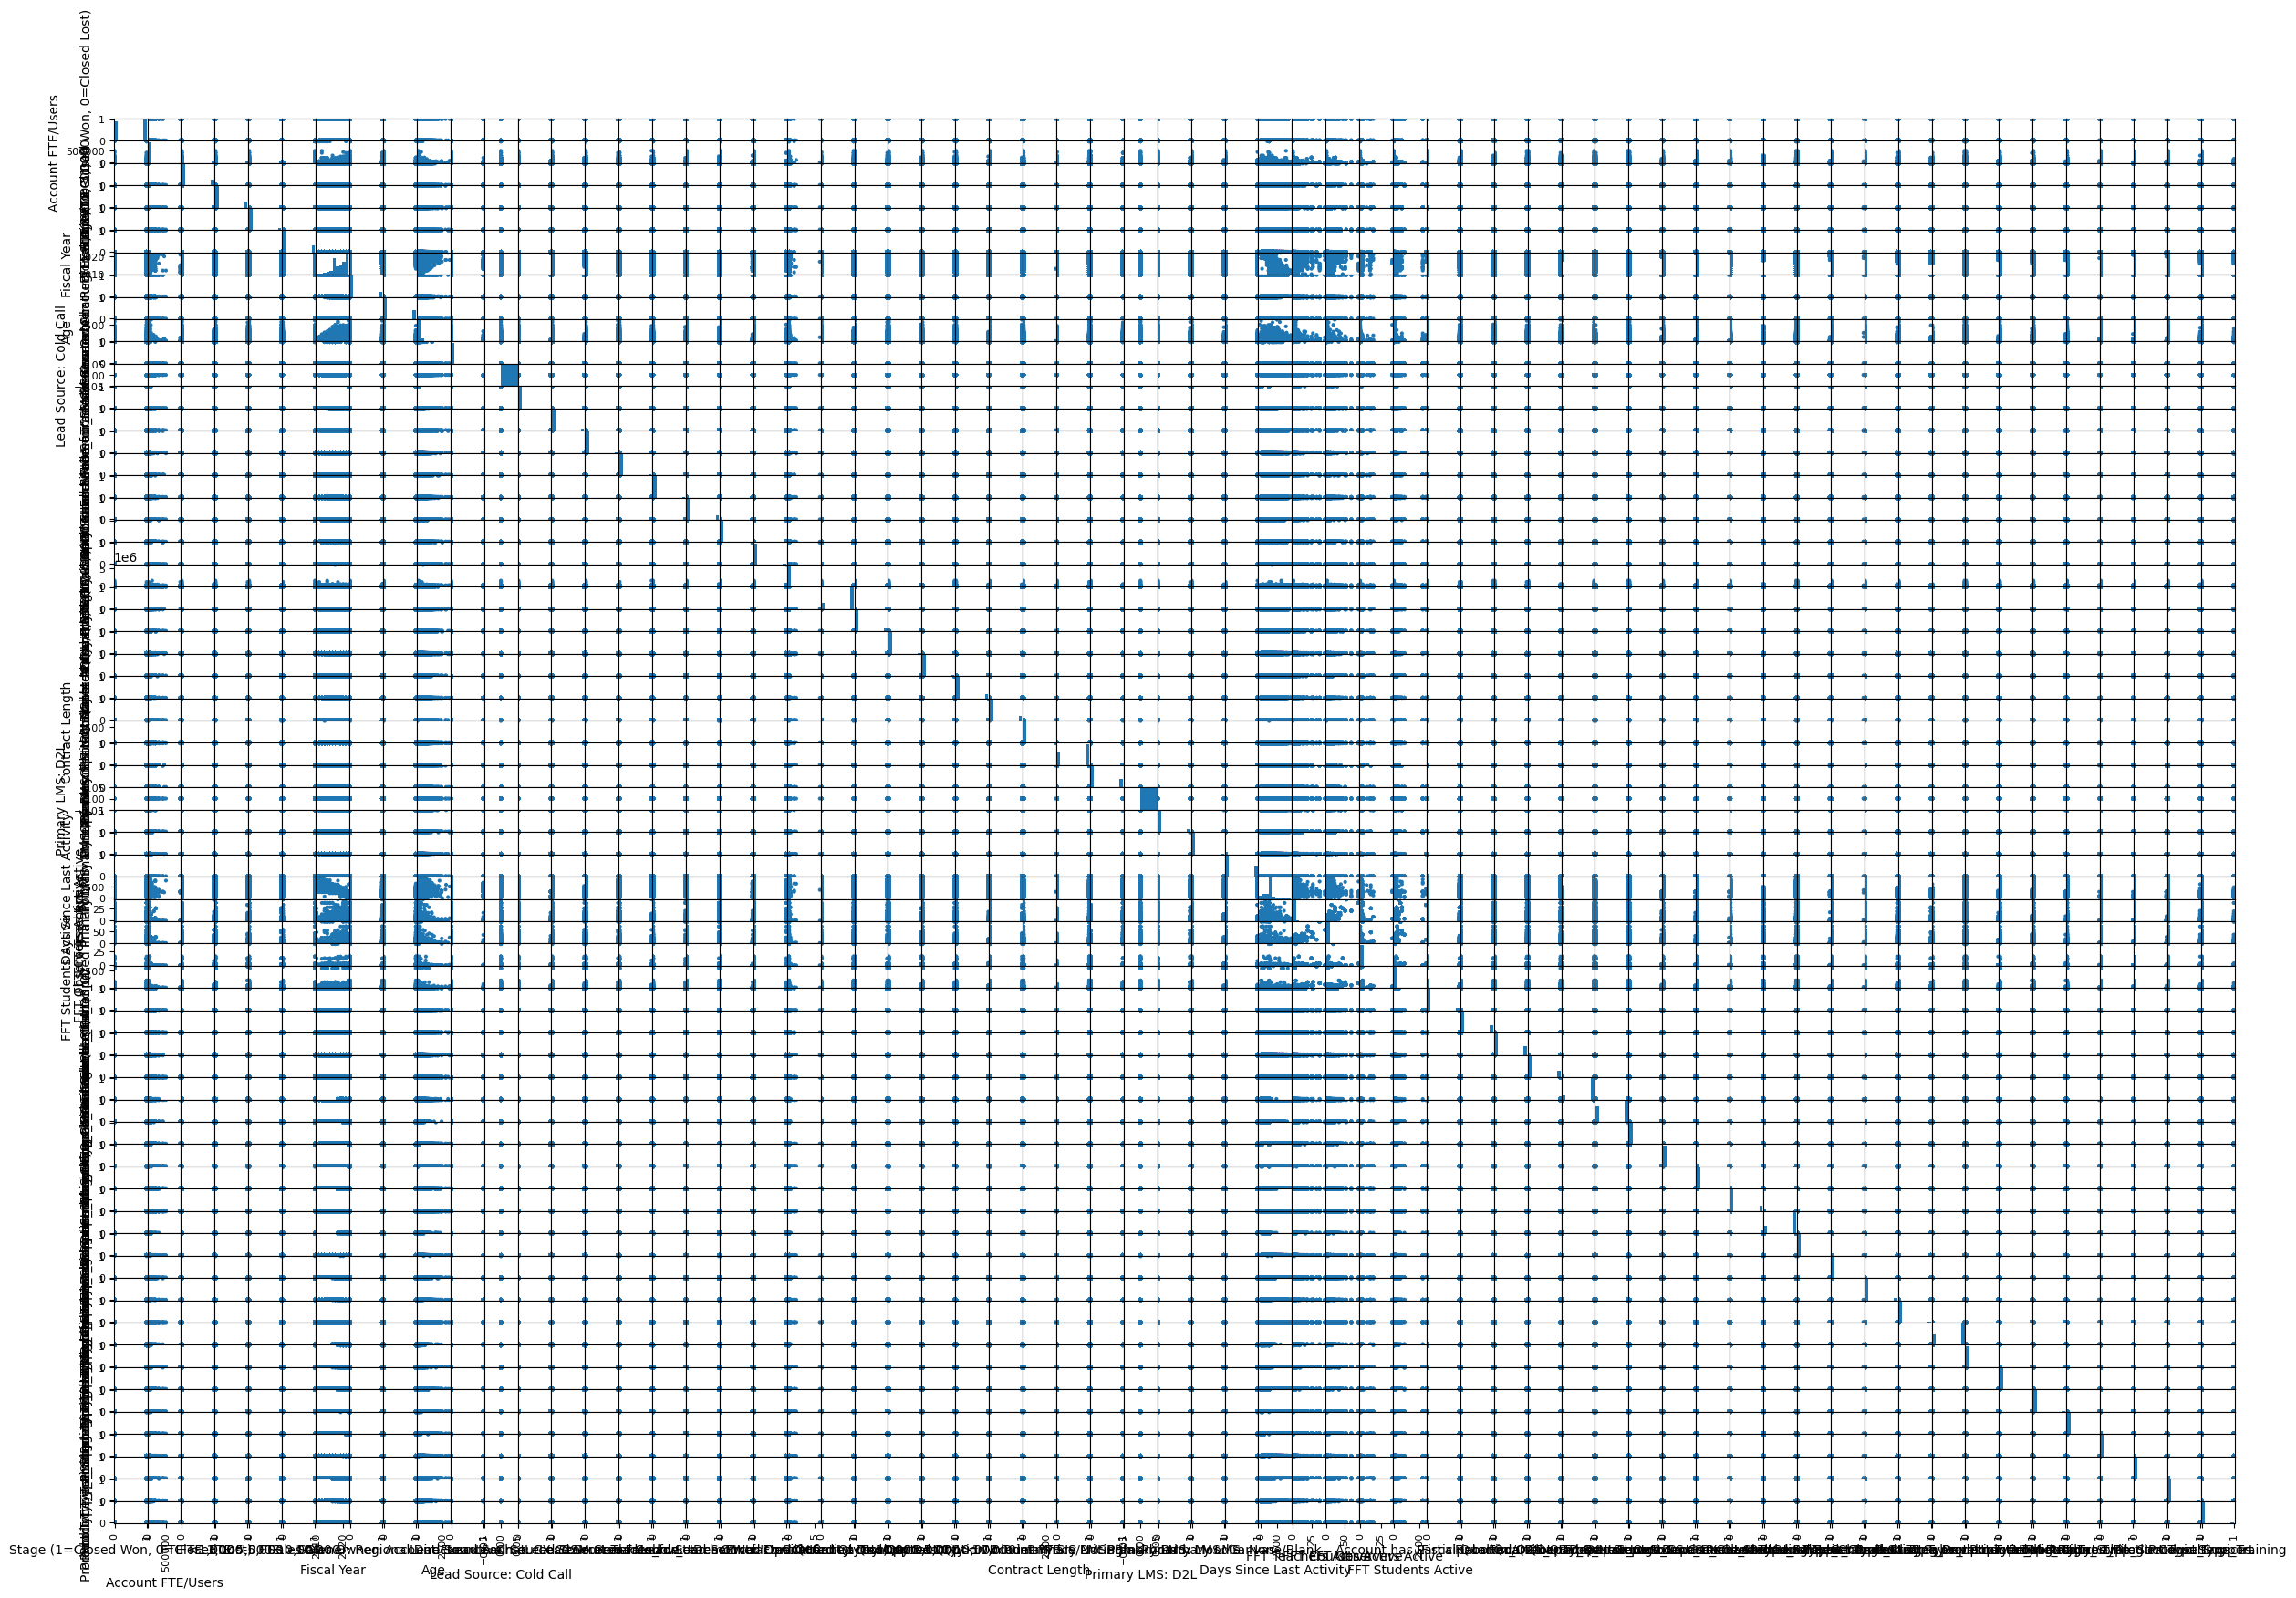

In [118]:
#bivariate visualization 
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))

plt.show()



In [119]:
#import packages for log regression
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [120]:
#perform logistic regression
x= df.drop('Stage (1=Closed Won, 0=Closed Lost)', axis =1)
y= df['Stage (1=Closed Won, 0=Closed Lost)']


In [121]:
model = LogisticRegression(solver= 'liblinear' , random_state=0)

model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn' , n_jobs=None, penalty='l2', random_state=0, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [122]:
# create a OLS model
model = sm.OLS(y, x)

# fit the data
est = model.fit()

# show summary
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Stage (1=Closed Won, 0=Closed Lost)   R-squared:                       0.222
Model:                                             OLS   Adj. R-squared:                  0.219
Method:                                  Least Squares   F-statistic:                     86.56
Date:                                 Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                                         14:43:24   Log-Likelihood:                -10782.
No. Observations:                                17981   AIC:                         2.168e+04
Df Residuals:                                    17921   BIC:                         2.215e+04
Df Model:                                           59                                         
Covariance Type:                             nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Account FTE/Users                        1.035e-07   1.12e-07      0.926      0.354   -1.16e-07    3.23e-07
FTE <1,000                                 -0.1104      0.011     -9.709      0.000      -0.133      -0.088
FTE 1,000-5,000                            -0.2295      0.012    -18.433      0.000      -0.254      -0.205
FTE 5,000-10,000                           -0.2349      0.016    -15.096      0.000      -0.265      -0.204
FTE >10,000                                -0.2366      0.014    -17.316      0.000      -0.263      -0.210
Fiscal Year                                -0.0136      0.002     -6.403      0.000      -0.018      -0.009
Sales Owner: Regional Director             -0.0198      0.010     -2.026      0.043      -0.039      -0.001
Sales Owner: Account Executive             -0.0891      0.010     -9.131      0.000      -0.108      -0.070
Age                                        -0.0004   1.64e-05    -23.363      0.000      -0.000      -0.000
Lead Source: Chat                           0.0697      0.029      2.428      0.015       0.013       0.126
Lead Source: Cold Call                  -3.322e-08   5.03e-09     -6.600      0.000   -4.31e-08   -2.34e-08
Lead Source: CX Generated                   0.0433      0.101      0.428      0.669      -0.155       0.242
Lead Source: CSM Generated                 -0.1154      0.014     -8.222      0.000      -0.143      -0.088
Lead Source: Tradeshow                      0.0986      0.017      5.900      0.000       0.066       0.131
Lead Source: Free_for_teacher              -0.0475      0.017     -2.759      0.006      -0.081      -0.014
Lead Source: "Demo"                        -0.0692      0.019     -3.607      0.000      -0.107      -0.032
Lead Source: "Web"                         -0.0358      0.010     -3.523      0.000      -0.056      -0.016
Lead Source: Email                         -0.0030      0.028     -0.106      0.916      -0.058       0.052
Email Opt Out                              -0.0325      0.019     -1.700      0.089      -0.070       0.005
Contracted Quantity: Total               1.707e-08   6.81e-08      0.251      0.802   -1.16e-07     1.5e-07
Contracted Qty <1,000                      28.1411      4.285      6.567      0.000      19.742      36.541
Contracted Qty 1,000-5,000                 28.3436      4.286      6.613      0.000      19.943      36.744
Contracted Qty 5,000-10,000                28.3524      4.286      6.615      0.000      19.952      36.753
Contracted Qty >10,000                     28.3099      4.286      6.605      0.000     

In [130]:
#create new data frame with statistically significant pvalues
df = df[['FTE <1,000',
        'FTE 1,000-5,000',
        'FTE 5,000-10,000',
        'FTE >10,000',
        'Sales Owner: Regional Director',
        'Sales Owner: Account Executive',
        'Age',
        'Lead Source: Chat',
        'Lead Source: Cold Call',
        'Lead Source: CSM Generated',
        'Lead Source: Tradeshow',
        'Lead Source: Free_for_teacher',
        'Lead Source: "Demo"',
        'Lead Source: "Web"',
        'Contracted Qty <1,000',
        'Contracted Qty 1,000-5,000',
        'Contracted Qty 5,000-10,000',
        'Contracted Qty >10,000',
        'Contract Qty = Account FTE',
        'Opp Description Inludes "Price/Pricing"',
        'Primary SIS Not Blank',
        'Primary LMS: Blackboard',
        'Primary LMS: D2L',
        'Primary LMS: Moodle',
        'Primary LMS: None/Blank',
        'Days Since Last Activity',
        'FFT Teachers Active', 
        'FFT Courses Active',
        'Fiscal Quarter_Q3', 
        'Fiscal Quarter_Q4',    
        'Inbound/Outbound Source_Outbound',     
        'Type_New Logo', 
        'Department Source_CS Generated', 
        'Department Source_Marketing Generated', 
        'Product Type_Cloud SaaS Subscription',
        'Product Type_Custom Development',
        'Product Type_Implementation',
        'Product Type_Migration',
        'Product Type_Partnership',
        'Product Type_Strategic Services',
        'Product Type_Training',
        'Stage (1=Closed Won, 0=Closed Lost)',]]


,"FTE <1,000","FTE 1,000-5,000","FTE 5,000-10,000","FTE >10,000",Sales Owner: Regional Director,Sales Owner: Account Executive,Age,Lead Source: Chat,Lead Source: Cold Call,Lead Source: CSM Generated,...,Department Source_Marketing Generated,Product Type_Cloud SaaS Subscription,Product Type_Custom Development,Product Type_Implementation,Product Type_Migration,Product Type_Partnership,Product Type_Strategic Services,Product Type_Strategic Services,Product Type_Training,"Stage (1=Closed Won, 0=Closed Lost)"
"FTE <1,000",1.000000,-0.274041,-0.161039,-0.290344,0.000068,0.096835,-0.026835,0.067478,NaN,-0.014037,...,0.145734,0.017456,-0.047696,-0.003440,-0.013327,-0.066769,-0.006785,-0.006785,0.071068,-0.007660
"FTE 1,000-5,000",-0.274041,1.000000,-0.174230,-0.314127,-0.006817,0.085556,0.088809,-0.012597,NaN,0.021610,...,-0.034820,0.009788,-0.019496,0.011160,0.015402,-0.083311,0.018181,0.018181,0.000143,-0.061469
"FTE 5,000-10,000",-0.161039,-0.174230,1.000000,-0.184595,0.008638,0.010634,0.021511,-0.026038,NaN,0.034320,...,-0.060476,-0.005226,0.022392,0.014562,0.007353,-0.045327,0.003075,0.003075,-0.020452,-0.015900
"FTE >10,000",-0.290344,-0.314127,-0.184595,1.000000,0.021862,0.015322,0.017618,-0.040097,NaN,0.045468,...,-0.129102,-0.014403,0.099704,-0.008209,0.039305,-0.081265,0.012504,0.012504,-0.038292,-0.008814
Sales Owner: Regional Director,0.000068,-0.006817,0.008638,0.021862,1.000000,-0.317919,0.052492,-0.002404,NaN,-0.058296,...,0.178338,0.060751,0.015699,-0.092693,0.033257,-0.067718,-0.018896,-0.018896,0.078801,-0.032383
Sales Owner: Account Executive,0.096835,0.085556,0.010634,0.015322,-0.317919,1.000000,-0.051538,0.006483,NaN,0.167860,...,0.161506,0.133656,0.087199,-0.268569,0.049451,-0.098878,0.058771,0.058771,0.114317,-0.061369
Age,-0.026835,0.088809,0.021511,0.017618,0.052492,-0.051538,1.000000,0.002283,NaN,-0.073367,...,0.056806,0.010459,-0.053464,0.092947,-0.013638,-0.079260,-0.031200,-0.031200,-0.030077,-0.201381
Lead Source: Chat,0.067478,-0.012597,-0.026038,-0.040097,-0.002404,0.006483,0.002283,1.000000,NaN,-0.035715,...,0.067446,-0.013535,-0.022396,0.020507,-0.001292,-0.006650,-0.007607,-0.007607,0.018000,-0.005053
Lead Source: Cold Call,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lead Source: CSM Generated,-0.014037,0.021610,0.034320,0.045468,-0.058296,0.167860,-0.073367,-0.035715,NaN,1.000000,...,-0.093921,-0.011659,0.055171,-0.048747,0.012914,-0.022062,0.036169,0.036169,0.025429,0.024591


<AxesSubplot:>

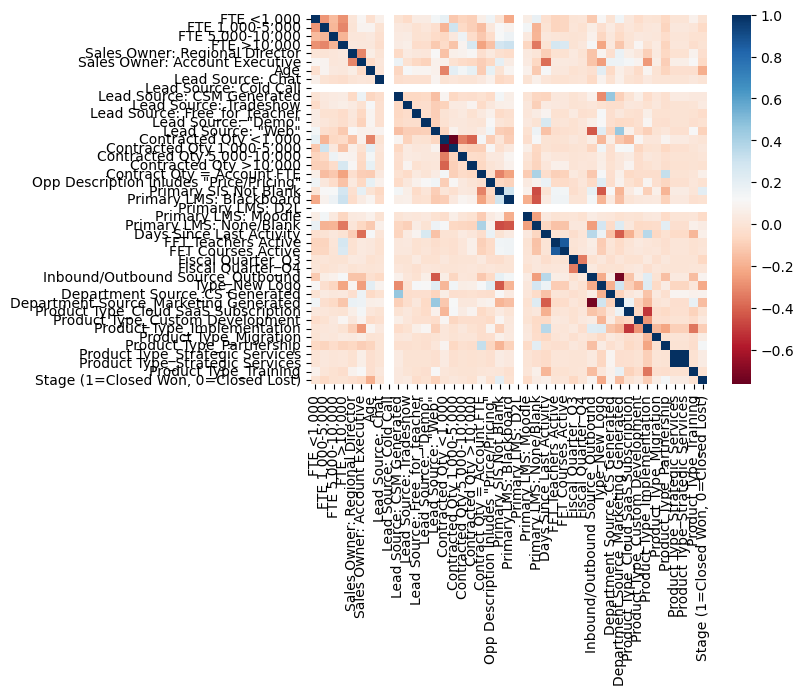

In [131]:
# test for multicolenearity 
corr = df.corr()
display(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')



In [132]:
# find VIF  
df_before = df

X1 = sm.tools.add_constant(df_before)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                                      0.000000
FTE <1,000                                 1.896444
FTE 1,000-5,000                            2.537131
FTE 5,000-10,000                           1.892435
FTE >10,000                                3.115076
Sales Owner: Regional Director             1.324273
Sales Owner: Account Executive             1.669042
Age                                        1.291325
Lead Source: Chat                          1.022238
Lead Source: Cold Call                          NaN
Lead Source: CSM Generated                 1.397773
Lead Source: Tradeshow                     1.067781
Lead Source: Free_for_teacher              1.079293
Lead Source: "Demo"                        1.124563
Lead Source: "Web"                         1.445136
Contracted Qty <1,000                           inf
Contracted Qty 1,000-5,000                      inf
Contracted Qty 5,000-10,000                     inf
Contracted Qty >10,000                          inf
Contract Qty

In [133]:
#drop Age
df_after = df.drop(['Contracted Qty <1,000'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                      51.982312
FTE <1,000                                  1.896444
FTE 1,000-5,000                             2.537131
FTE 5,000-10,000                            1.892435
FTE >10,000                                 3.115076
Sales Owner: Regional Director              1.324273
Sales Owner: Account Executive              1.669042
Age                                         1.291325
Lead Source: Chat                           1.022238
Lead Source: Cold Call                           NaN
Lead Source: CSM Generated                  1.397773
Lead Source: Tradeshow                      1.067781
Lead Source: Free_for_teacher               1.079293
Lead Source: "Demo"                         1.124563
Lead Source: "Web"                          1.445136
Contracted Qty 1,000-5,000                  1.295130
Contracted Qty 5,000-10,000                 1.127055
Contracted Qty >10,000                      1.205715
Contract Qty = Account FTE                  1.

In [134]:
#drop Department Source_Sales Generated
df_after = df_after.drop(['Product Type_Strategic Services'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                      51.373805
FTE <1,000                                  1.896420
FTE 1,000-5,000                             2.536815
FTE 5,000-10,000                            1.892429
FTE >10,000                                 3.115065
Sales Owner: Regional Director              1.323978
Sales Owner: Account Executive              1.669041
Age                                         1.291325
Lead Source: Chat                           1.022238
Lead Source: Cold Call                           NaN
Lead Source: CSM Generated                  1.397630
Lead Source: Tradeshow                      1.067513
Lead Source: Free_for_teacher               1.079290
Lead Source: "Demo"                         1.124560
Lead Source: "Web"                          1.445104
Contracted Qty 1,000-5,000                  1.294559
Contracted Qty 5,000-10,000                 1.127016
Contracted Qty >10,000                      1.205629
Contract Qty = Account FTE                  1.

In [135]:
#drop Department Source_Sales Generated
df_after = df_after.drop(['Lead Source: Cold Call'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                      51.373805
FTE <1,000                                  1.896420
FTE 1,000-5,000                             2.536815
FTE 5,000-10,000                            1.892429
FTE >10,000                                 3.115065
Sales Owner: Regional Director              1.323978
Sales Owner: Account Executive              1.669041
Age                                         1.291325
Lead Source: Chat                           1.022238
Lead Source: CSM Generated                  1.397630
Lead Source: Tradeshow                      1.067513
Lead Source: Free_for_teacher               1.079290
Lead Source: "Demo"                         1.124560
Lead Source: "Web"                          1.445104
Contracted Qty 1,000-5,000                  1.294559
Contracted Qty 5,000-10,000                 1.127016
Contracted Qty >10,000                      1.205629
Contract Qty = Account FTE                  1.431119
Opp Description Inludes "Price/Pricing"     1.

In [136]:
#drop Department Source_Sales Generated
df_after = df_after.drop(['Primary LMS: D2L'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                      51.373805
FTE <1,000                                  1.896420
FTE 1,000-5,000                             2.536815
FTE 5,000-10,000                            1.892429
FTE >10,000                                 3.115065
Sales Owner: Regional Director              1.323978
Sales Owner: Account Executive              1.669041
Age                                         1.291325
Lead Source: Chat                           1.022238
Lead Source: CSM Generated                  1.397630
Lead Source: Tradeshow                      1.067513
Lead Source: Free_for_teacher               1.079290
Lead Source: "Demo"                         1.124560
Lead Source: "Web"                          1.445104
Contracted Qty 1,000-5,000                  1.294559
Contracted Qty 5,000-10,000                 1.127016
Contracted Qty >10,000                      1.205629
Contract Qty = Account FTE                  1.431119
Opp Description Inludes "Price/Pricing"     1.

In [137]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [138]:
#perform logistic regression
x= df_after.drop('Stage (1=Closed Won, 0=Closed Lost)', axis =1)
y= df_after['Stage (1=Closed Won, 0=Closed Lost)']

In [139]:
model = LogisticRegression(solver= 'liblinear' , random_state=0)

model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn' , n_jobs=None, penalty='l2', random_state=0, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# create a OLS model
model = sm.OLS(y, x)

# fit the data
est = model.fit()

# show summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Stage (1=Closed Won, 0=Closed Lost)   R-squared (uncentered):                   0.604
Model:                                             OLS   Adj. R-squared (uncentered):              0.603
Method:                                  Least Squares   F-statistic:                              740.1
Date:                                 Thu, 15 Dec 2022   Prob (F-statistic):                        0.00
Time:                                         15:48:39   Log-Likelihood:                         -11294.
No. Observations:                                17981   AIC:                                  2.266e+04
Df Residuals:                                    17944   BIC:                                  2.295e+04
Df Model:                                           37                                                  
Covariance Type:                             nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
FTE <1,000                                 -0.0380      0.011     -3.353      0.001      -0.060      -0.016
FTE 1,000-5,000                            -0.1199      0.012     -9.798      0.000      -0.144      -0.096
FTE 5,000-10,000                           -0.1151      0.015     -7.428      0.000      -0.145      -0.085
FTE >10,000                                -0.1029      0.013     -7.899      0.000      -0.128      -0.077
Sales Owner: Regional Director              0.0239      0.010      2.480      0.013       0.005       0.043
Sales Owner: Account Executive             -0.0303      0.009     -3.284      0.001      -0.048      -0.012
Age                                        -0.0004   1.67e-05    -23.531      0.000      -0.000      -0.000
Lead Source: Chat                           0.0688      0.030      2.331      0.020       0.011       0.127
Lead Source: CSM Generated                 -0.1045      0.014     -7.281      0.000      -0.133      -0.076
Lead Source: Tradeshow                      0.1213      0.017      7.092      0.000       0.088       0.155
Lead Source: Free_for_teacher              -0.0419      0.018     -2.372      0.018      -0.076      -0.007
Lead Source: "Demo"                        -0.0913      0.020     -4.647      0.000      -0.130      -0.053
Lead Source: "Web"                         -0.0054      0.010     -0.522      0.601      -0.026       0.015
Contracted Qty 1,000-5,000                  0.2004      0.011     18.985      0.000       0.180       0.221
Contracted Qty 5,000-10,000                 0.1806      0.020      9.177      0.000       0.142       0.219
Contracted Qty >10,000                      0.1522      0.017      8.802      0.000       0.118       0.186
Contract Qty = Account FTE                  0.0913      0.011      8.491      0.000       0.070       0.112
Opp Description Inludes "Price/Pricing"     0.0468      0.010      4.910      0.000       0.028       0.066
Primary SIS Not Blank                       0.3589      0.009     40.928      0.000       0.342       0.376
Primary LMS: Blackboard                     0.0055      0.009      0.596      0.551      -0.013       0.024
Primary LMS: Moodle                         0.0016      0.012      0.138      0.891      -0.022       0.025
Primary LMS: None/Blank                     0.1949      0.010     19.815      0.000       0.176       0.214
Days Since Last Activity                    0.0001   5.87e-06     18.764      0.000    9.86e-05  